In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import datetime

import seaborn as sns
sns.set()

In [162]:
def df_price_OHLCV_cryptocompare(timeframe='day', symbol='BTC', comparison_symbol='USD', limit=0,
                        aggregate=1, exchange='CCCAGG', print_url=False):
    """Returns a pandas.Dataframe containing OHLC daily data for the specified
    pair of symbols

    Parameters
    ----------
        timeframe : {'day', 'hour', 'minute'}, default 'day'
            'day' : get daily data
            'hour' : get data for each hour
            'minute' : get data for each minute
        symbol : string
            currency we buy, default BTC
        comparison_symbol : string
            currency we sell, default USD
        limit : int
            0 : returns all data available
            > 0 : returns last n rows
        exchange : string, optional
            exchange which we want to get the data from
        print_url : bool, default False
            prints the url that makes the call to the API

    Returns
    ----------
        df : pandas.DataFrame
            DataFrame containing OHLCV historical data
                OHLC : Open, High, Low, Close
                Volume : Volume in the currency being bought
                Volume (...) : Volume in the currency being sold
    """

    url = 'https://min-api.cryptocompare.com/data/histo{}?fsym={}&tsym={}&limit={}&aggregate={}&e={}'\
            .format(timeframe, symbol.upper(), comparison_symbol.upper(), limit-1, aggregate, exchange)
    if not limit:
        url += '&allData=True'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['Date'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df.index = pd.to_datetime(df.Date)
    if timeframe == 'day':
        df.index = df.index.normalize() # so that the index has only date, not hour. Easier to merge wit other data
    df = df.drop(['Date', 'time'], axis=1)
    df.columns = ['Close', 'High', 'Low', 'Open',
                  'Volume',
                  # 'Volume']
                  'Volume ({})'.format(comparison_symbol)]
    if print_url:
        print(url)
    return df

In [163]:
bitcoin = df_price_OHLCV_cryptocompare()

In [164]:
bitcoin.shape

(2782, 6)

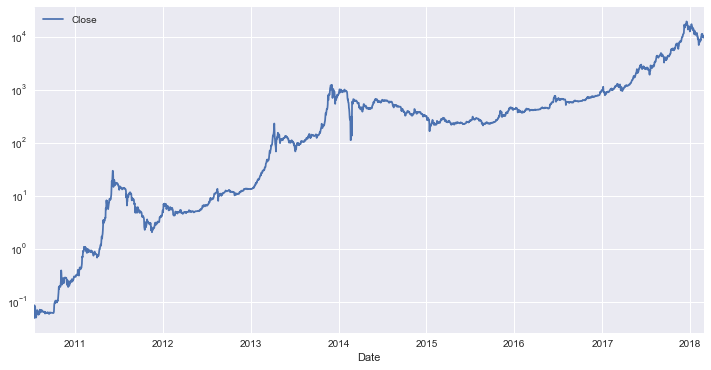

In [165]:
bitcoin.Close.plot(logy=True);
plt.legend();

In [166]:
bitcoin['Returns'] = (bitcoin['Close'].pct_change() + 1).fillna(1)
bitcoin.head()

,Close,High,Low,Open,Volume,Volume (USD),Returns
Date,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902,1.000000
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900,1.733791
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600,0.941286
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900,0.925000
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600,1.059807


In [167]:
bitcoin.tail()

,Close,High,Low,Open,Volume,Volume (USD),Returns
Date,,,,,,,
2018-02-22,9847.96,10941.57,9757.19,10481.66,175506.26,1.795952e+09,0.939542
2018-02-23,10175.51,10420.67,9604.00,9847.96,139373.76,1.399448e+09,1.033261
2018-02-24,9705.73,10528.00,9396.54,10175.51,125269.68,1.244484e+09,0.953832
2018-02-25,9610.11,9873.79,9329.44,9705.73,82430.45,7.930932e+08,0.990148
2018-02-26,10329.19,10364.01,9411.82,9610.11,72621.25,7.193527e+08,1.074825


In [168]:
decimals = 2
returns_strings = ['{:.3f}'.format(r) for r in bitcoin.Returns]

print(returns_strings)

['1.000', '1.734', '0.941', '0.925', '1.060', '0.638', '1.240', '0.871', '0.926', '1.109', '1.071', '0.982', '1.187', '0.897', '1.082', '0.901', '0.982', '1.000', '0.950', '1.070', '1.021', '0.947', '1.032', '1.166', '0.986', '0.957', '1.045', '0.921', '1.039', '0.974', '1.003', '1.069', '0.971', '0.981', '0.982', '1.014', '0.994', '0.983', '1.001', '0.997', '0.988', '1.016', '0.986', '0.998', '1.015', '0.924', '1.048', '1.008', '0.960', '1.025', '0.987', '1.000', '0.990', '1.016', '0.986', '1.011', '1.030', '0.966', '1.011', '0.997', '0.974', '1.025', '0.953', '1.034', '1.028', '0.990', '1.009', '0.993', '1.002', '0.998', '0.997', '1.000', '1.003', '0.995', '1.000', '1.000', '1.001', '0.991', '0.995', '1.003', '1.002', '1.023', '1.067', '1.296', '1.080', '1.029', '0.984', '0.999', '1.106', '0.971', '1.029', '0.962', '1.010', '1.004', '0.947', '1.021', '1.081', '0.958', '1.029', '1.090', '1.148', '1.139', '1.249', '0.922', '1.098', '1.047', '0.968', '1.016', '0.991', '0.996', '1.191', 

In [169]:
[np.round(x, 3) for x in bitcoin.Returns.tail(20)]

[0.98599999999999999,
 1.0880000000000001,
 1.0529999999999999,
 0.98499999999999999,
 0.94299999999999995,
 1.1020000000000001,
 0.95899999999999996,
 1.1100000000000001,
 1.0580000000000001,
 1.0149999999999999,
 1.089,
 0.93899999999999995,
 1.073,
 1.0069999999999999,
 0.93100000000000005,
 0.93999999999999995,
 1.0329999999999999,
 0.95399999999999996,
 0.98999999999999999,
 1.075]

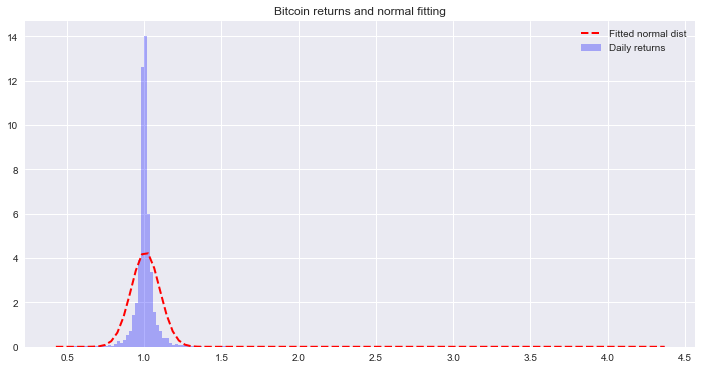

In [170]:
# Trying to fit the returns to a normal distribution 

from scipy.stats import norm

parameters = norm.fit(bitcoin.Returns)

# now, parameters[0] and parameters[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(min(bitcoin.Returns), max(bitcoin.Returns), 100)

# Generate the pdf (fitted distribution)
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
# Generate the pdf (normal distribution non fitted)
normal_pdf = norm.pdf(x)

# Type help(plot) for a ton of information on pyplot
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
# plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(bitcoin.Returns,normed=1,color="b",alpha=.3, bins=200, label='Daily returns') #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Bitcoin returns and normal fitting")
# insert a legend in the plot (using label)
plt.legend()
# plt.yscale('log')
plt.show()

In [171]:
datetime.date.today()

datetime.date(2018, 2, 26)

In [172]:
index_future = pd.date_range(start=datetime.date.today(), end='2018-12-31')
index_future.shape

(309,)

In [173]:
num_random_walks = 100000

np.random.seed(1234)
simulated_returns_bitcoin = np.random.choice(bitcoin.Returns, size=(len(index_future), num_random_walks))
sim_bitcoin_returns = pd.DataFrame(data=simulated_returns_bitcoin, index=index_future)
sim_bitcoin_returns.iloc[0, :] = 1

In [174]:
sim_bitcoin_returns.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
2018-02-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-02-27,0.998696,0.995868,0.973145,0.954142,1.007130,1.010780,1.166816,0.999839,0.985185,1.020987
2018-02-28,0.997688,0.987900,1.074825,0.971429,0.985507,0.962400,1.029371,1.010981,1.042673,1.007900
2018-03-01,0.971825,0.998758,0.995976,1.010032,0.944228,1.002178,1.019457,0.560983,1.016418,0.986754
2018-03-02,1.089165,1.091503,1.051985,1.059381,1.007156,1.022857,1.003289,1.020440,1.032132,1.070434
2018-03-03,0.994118,0.979391,1.001298,1.020987,0.997792,1.017862,0.967719,1.011038,1.145134,0.977057
2018-03-04,0.991309,1.006484,1.002630,0.897668,1.015038,1.000039,1.035950,0.998521,0.990812,1.077203
2018-03-05,1.022392,1.068702,1.005923,0.807934,1.073441,0.920923,1.000000,1.030982,1.029755,0.991150
2018-03-06,0.996705,1.001278,1.003165,0.992318,0.977036,1.010966,1.272011,0.964697,1.006855,1.095834
2018-03-07,0.971393,0.990299,0.995420,1.138636,0.961007,1.057143,1.009401,1.001965,0.976423,0.998521


In [175]:
cum_sim_bitcoin = sim_bitcoin_returns.cumprod(axis=0)
cum_sim_bitcoin.shape

(309, 100000)

In [176]:
cum_sim_bitcoin.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
2018-02-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-02-27,0.998696,0.995868,0.973145,0.954142,1.007130,1.010780,1.166816,0.999839,0.985185,1.020987
2018-02-28,0.996386,0.983818,1.045961,0.926881,0.992534,0.972775,1.201086,1.010818,1.027226,1.029052
2018-03-01,0.968313,0.982596,1.041752,0.936179,0.937178,0.974894,1.224455,0.567051,1.044091,1.015421
2018-03-02,1.054652,1.072506,1.095907,0.991771,0.943884,0.997177,1.228482,0.578642,1.077640,1.086941
2018-03-03,1.048449,1.050402,1.097330,1.012585,0.941800,1.014989,1.188825,0.585029,1.234042,1.062004
2018-03-04,1.039337,1.057213,1.100216,0.908965,0.955963,1.015028,1.231563,0.584163,1.222703,1.143993
2018-03-05,1.062610,1.129846,1.106733,0.734384,1.026169,0.934762,1.231563,0.602262,1.259085,1.133869
2018-03-06,1.059108,1.131290,1.110235,0.728742,1.002605,0.945013,1.566562,0.581000,1.267716,1.242533
2018-03-07,1.028811,1.120315,1.105150,0.829772,0.963511,0.999014,1.581288,0.582141,1.237827,1.240695


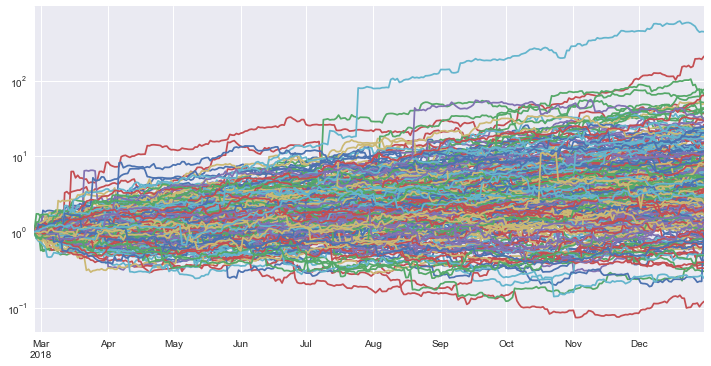

In [177]:
cum_sim_bitcoin.iloc[:, :300].plot(legend=False, logy=True)
# plt.legend(False)

In [178]:
future = pd.DataFrame(data=cum_sim_bitcoin, index=index_future)
future = future * bitcoin['Close'][-1]

In [179]:
future.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
2018-02-26,10329.190000,10329.190000,10329.190000,10329.190000,10329.190000,10329.190000,10329.190000,10329.190000,10329.190000,10329.190000
2018-02-27,10315.716675,10286.507397,10051.798148,9855.514127,10402.836905,10440.535922,12052.259640,10327.522572,10176.168138,10545.964807
2018-02-28,10291.861797,10162.044318,10803.927625,9573.928009,10252.071152,10047.974961,12406.242091,10440.926411,10610.413511,10629.277528
2018-03-01,10001.885807,10149.418094,10760.451055,9669.974126,9680.290951,10069.861359,12647.632101,5857.178952,10784.614330,10488.480276
2018-03-02,10893.705810,11078.116250,11319.835651,10244.190245,9749.559580,10300.029619,12689.224055,5976.901163,11131.149392,11227.222699
2018-03-03,10829.625187,10849.804781,11334.529000,10459.181195,9728.034308,10484.011185,12279.600610,6042.871375,12746.653602,10969.638891
2018-03-04,10735.508280,10920.155784,11364.335888,9388.876383,9874.320538,10484.418933,12721.050614,6033.932216,12629.531908,11816.522911
2018-03-05,10975.899235,11670.395495,11431.650642,7585.590696,10599.498818,9655.337520,12721.050614,6220.875525,13005.328997,11711.948698
2018-03-06,10939.731767,11685.309005,11467.826752,7527.314711,10356.096640,9761.222430,16181.312138,6001.258063,13094.482923,12834.355302
2018-03-07,10626.783703,11571.950087,11415.306663,8570.874251,9952.286456,10319.006569,16333.429245,6013.048354,12785.753747,12815.369569


In [180]:
possible_prices = future.iloc[-1, :]
possible_prices.name = 'Possible price'

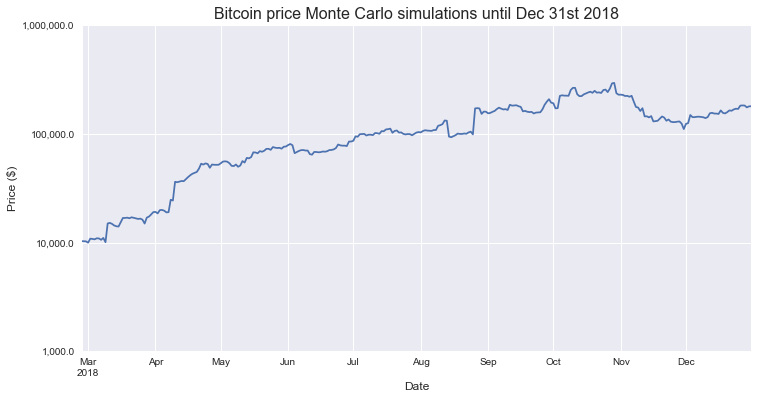

In [181]:
future.iloc[:, :1].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

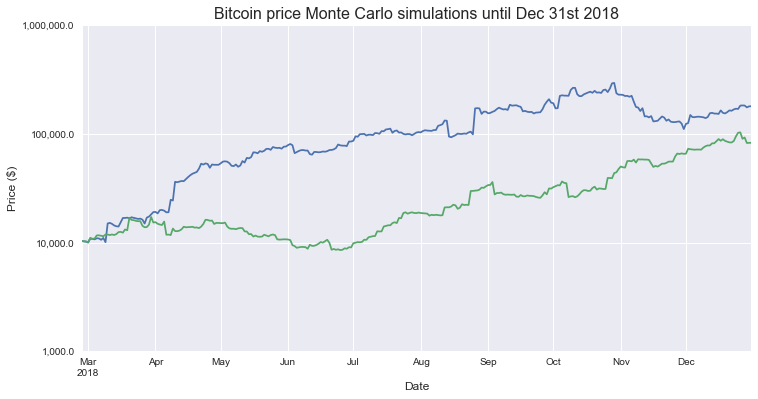

In [182]:
future.iloc[:, :2].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

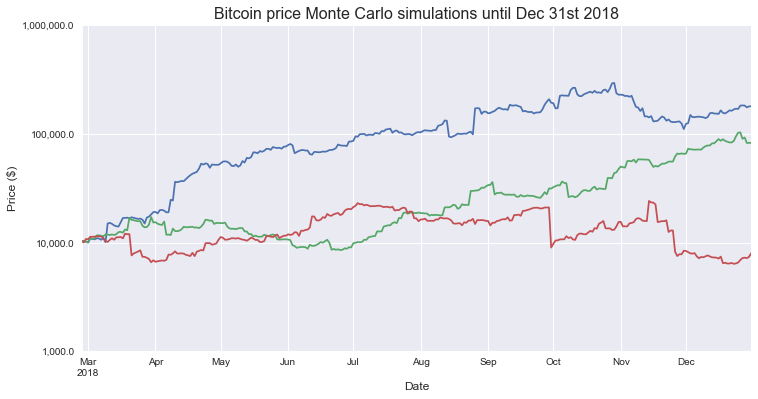

In [183]:
future.iloc[:, :3].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

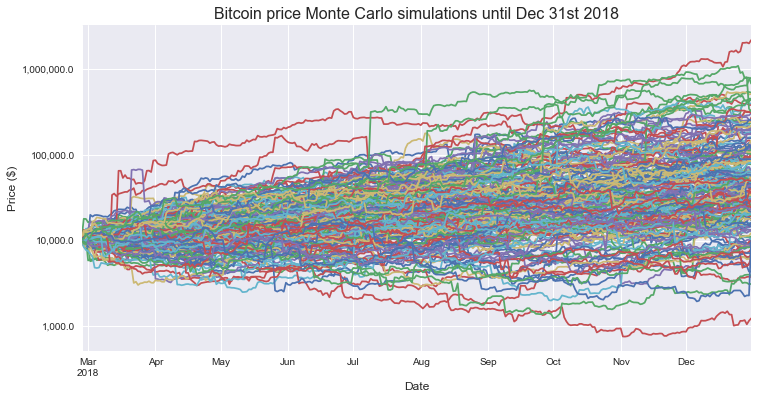

In [184]:
future.iloc[:, :200].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

In [185]:
mean_geom_return = (bitcoin.Close[-1] / bitcoin.Close[0]) ** (1 / len(bitcoin))

mean_geom_return

1.0044124055293431

In [186]:
bitcoin.Close[0]

0.049509999999999998

In [187]:
bitcoin.Close[-1]

10329.190000000001

In [188]:
bitcoin.Close[0] * mean_geom_return ** len(bitcoin)

10329.18999999814

In [189]:
geom_evolution_future = pd.Series([mean_geom_return ** n for n in np.arange(len(index_future))], 
                                  index=index_future)
geom_evolution_future.head()

2018-02-26    1.000000
2018-02-27    1.004412
2018-02-28    1.008844
2018-03-01    1.013296
2018-03-02    1.017767
Freq: D, dtype: float64

In [190]:
price_geom_evolution_future = geom_evolution_future * bitcoin.Close[-1]
price_geom_evolution_future.tail()

2018-12-27    39385.372383
2018-12-28    39559.156618
2018-12-29    39733.707659
2018-12-30    39909.028890
2018-12-31    40085.123710
Freq: D, dtype: float64

In [191]:
price_geom_evolution_future.head()

2018-02-26    10329.190000
2018-02-27    10374.766575
2018-02-28    10420.544252
2018-03-01    10466.523920
2018-03-02    10512.706468
Freq: D, dtype: float64

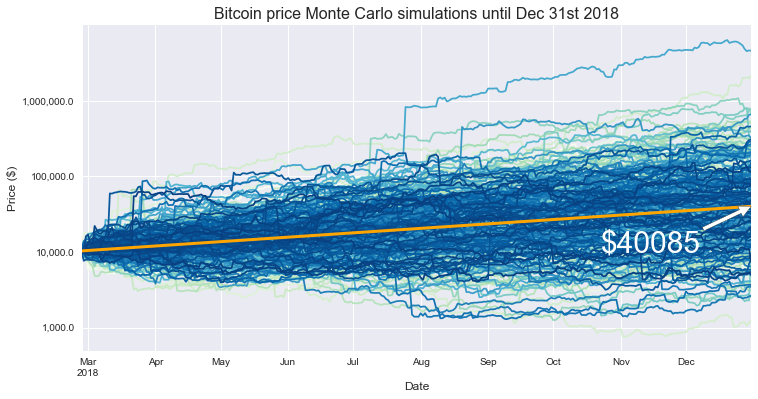

In [192]:
future.iloc[:, :400].plot(legend=False, logy=True, grid=True, colormap='GnBu');
price_geom_evolution_future.plot(logy=True, color='orange', linewidth=3)
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
plt.annotate('${}'.format(int(round(price_geom_evolution_future.tail(1)))), 
            xy=(index_future[-1], price_geom_evolution_future.tail(1)), 
            xytext=(index_future[-70], 10000),
            arrowprops=dict(facecolor='white', shrink=0.0),
            size=30,
            color='white')
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

plt.show()

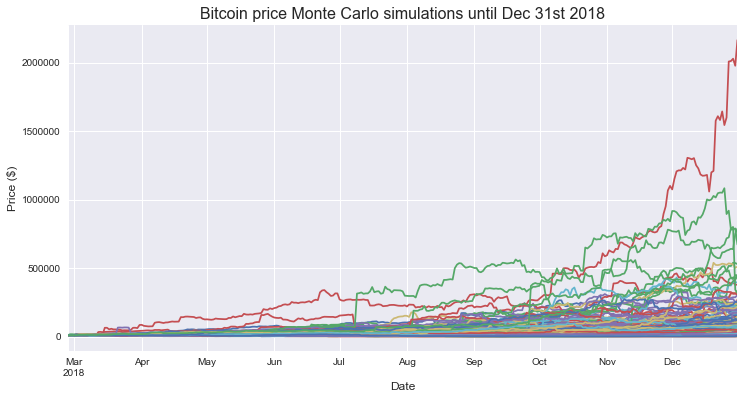

In [193]:
future.iloc[:, :200].plot(legend=False, logy=False, grid=True);
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);

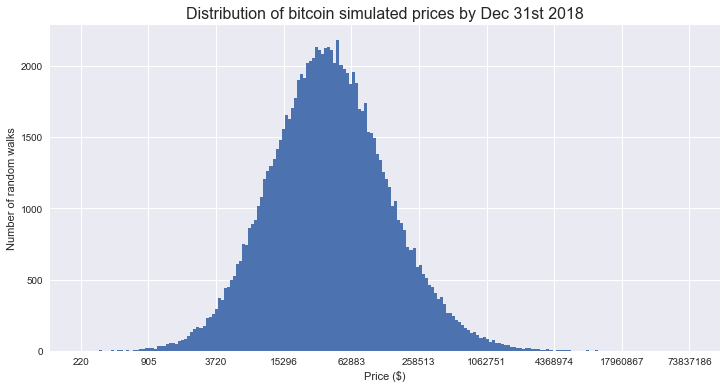

In [194]:
y, x, _ = plt.hist(np.log(possible_prices), bins=200);
xticks = plt.xticks()
ticks = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), 10)
plt.xticks(ticks, [str(int(np.exp(tick))) for tick in ticks]);

plt.xlabel('Price ($)')
plt.ylabel('Number of random walks')
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16);

In [195]:
from scipy.stats import gaussian_kde

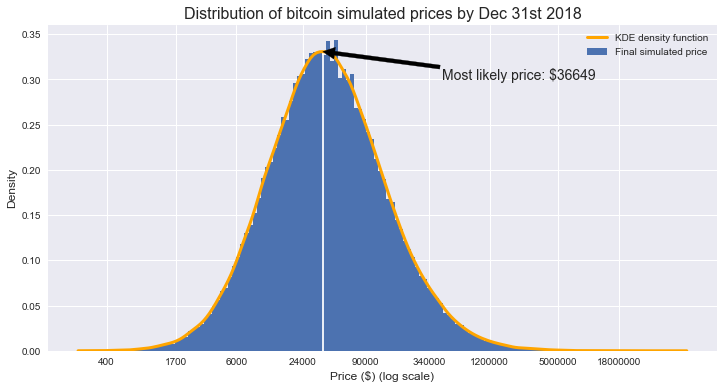

In [196]:
# More logical ticks

bins = 200


# Plot histogram of final simulated prices
fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=150, density=True, label='Final simulated price');
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])

# Plot KDE function
kde = gaussian_kde(np.log(possible_prices))
x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
ax.plot(x, kde.pdf(x), linewidth=3, c='orange', alpha=1, label='KDE density function')

# Plot vertical line at the most likely price
most_likely_price = np.exp(x[np.argmax(kde.pdf(x))])
# most_likely_price = possible_prices.quantile(0.5)
ax.vlines(np.log(most_likely_price), 0, kde.pdf(np.log(most_likely_price)), color='w')

# Draw annotation
ax.annotate('Most likely price: ${}'.format(int(round(most_likely_price))), 
            xy=(np.log(most_likely_price), kde.pdf(np.log(most_likely_price))), 
            xytext=(13, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.0),
            size=14)

plt.legend()

plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Density', size=12)
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16)


plt.show()

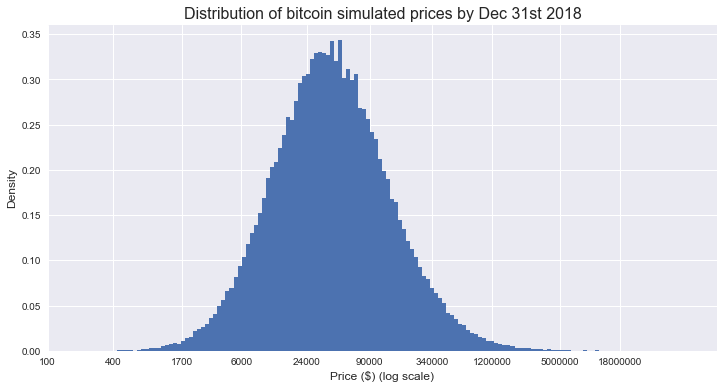

In [197]:
# More logical ticks

fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=150, density=True);
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])

# # Plot KDE function
# kde = gaussian_kde(np.log(possible_prices))
# x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
# ax.plot(x, kde.pdf(x), linewidth=2, c='orange', alpha=1)

# # # Plot vertical line at the most likely price
# most_likely_price = np.exp(x[np.argmax(kde.pdf(x))])
# # most_likely_price = possible_prices.quantile(0.5)
# ax.vlines(np.log(most_likely_price), 0, kde.pdf(np.log(most_likely_price)), color='w')

# # Draw annotation
# ax.annotate('Most likely price: ${}'.format(int(round(most_likely_price))), 
#             xy=(np.log(most_likely_price), kde.pdf(np.log(most_likely_price))), 
#             xytext=(13, 0.3),
#             arrowprops=dict(facecolor='black', shrink=0.0),
#             size=14)


plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Density', size=12)
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16)


plt.show()

In [198]:
most_likely_price

36649.107214549251

In [199]:
possible_prices.quantile(0.5)

38837.92631267963

In [200]:
possible_prices.quantile(0.05)

5498.440599634002

In [201]:
possible_prices.quantile(0.95)

325933.60241246026

In [202]:
# 80% confidence interval

possible_prices.quantile(.1), possible_prices.quantile(.9)

(8444.59700863525, 195736.51521313106)

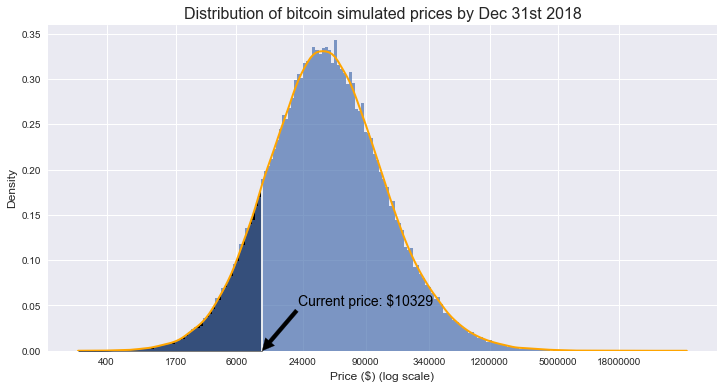

In [203]:
# More logical ticks

fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=200, density=True, alpha=0.7);
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])

# Plot KDE function
kde = gaussian_kde(np.log(possible_prices))
x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
ax.plot(x, kde.pdf(x), linewidth=2, c='orange', alpha=1)

# Plot vertical line at today's price
current_price = bitcoin.Close[-1]
ax.vlines(np.log(current_price), 0, kde.pdf(np.log(current_price)), color='w')

# Draw annotation
ax.annotate('Current price: ${}'.format(int(round(current_price))), 
            xy=(np.log(current_price), 0), 
            xytext=(10, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.0),
            size=14, 
            color='black')

# Plot area below current price
x_fill = np.linspace(min(np.log(possible_prices)), np.log(current_price), bins)
ax.fill_between(x_fill, kde.pdf(x_fill), color='black')


plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Density', size=12)
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16)

plt.show()

In [204]:
# Probability that bitcoin's price is lower than today's by the end of the year

kde.integrate_box(0, np.log(bitcoin.Close[-1])) * 100

13.468093342786197

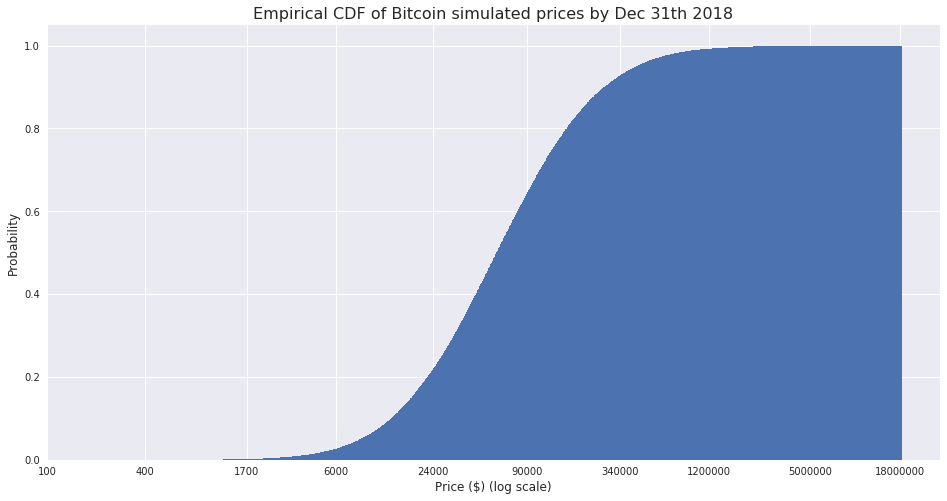

In [302]:
# More logical ticks

fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=2000, density=True, cumulative=True);
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])


# # Plot vertical line at the most likely price
# most_likely_price = np.exp(x[np.argmax(kde.pdf(x))])
# ax.vlines(np.log(most_likely_price), 0, kde.pdf(np.log(most_likely_price)), color='w')

# # Draw annotation
# ax.annotate('Most likely price: ${} per bitcoin'.format(int(round(most_likely_price))), 
#             xy=(np.log(most_likely_price), kde.pdf(np.log(most_likely_price))), 
#             xytext=(13, 0.3),
#             arrowprops=dict(facecolor='black', shrink=0.0),
#             size=14)


plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Probability', size=12)
plt.title('Empirical CDF of Bitcoin simulated prices by Dec 31st 2018', size=16)

plt.show()

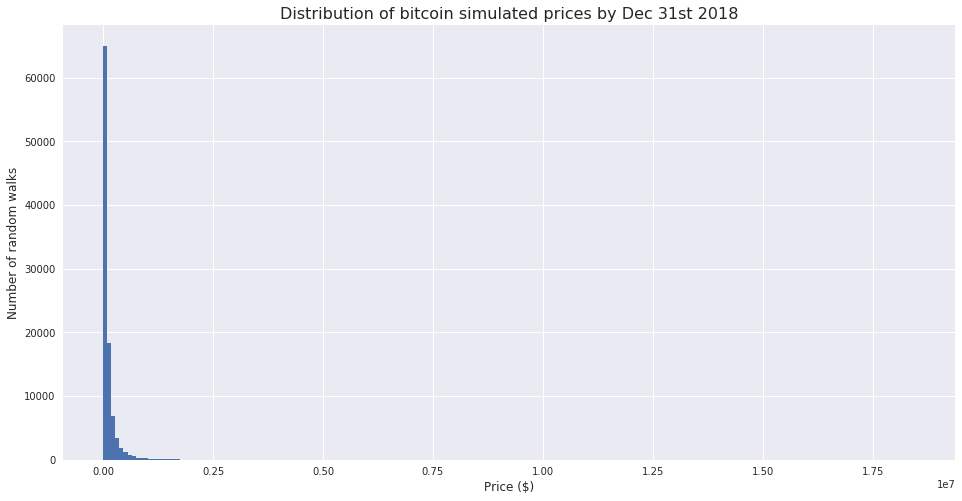

In [374]:
fig, ax = plt.subplots()
ax.hist(possible_prices, bins=200, density=False);
# xticks = plt.xticks()
# hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# # plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
# ax.set_xticks(np.log(hand_ticks))
# ax.set_xticklabels([str(tick) for tick in hand_ticks])

# kde = gaussian_kde(np.log(possible_prices))
# x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
# ax.plot(x, kde.pdf(x))


plt.xlabel('Price ($)', size=12)
plt.ylabel('Number of random walks', size=12)
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16)

plt.show()

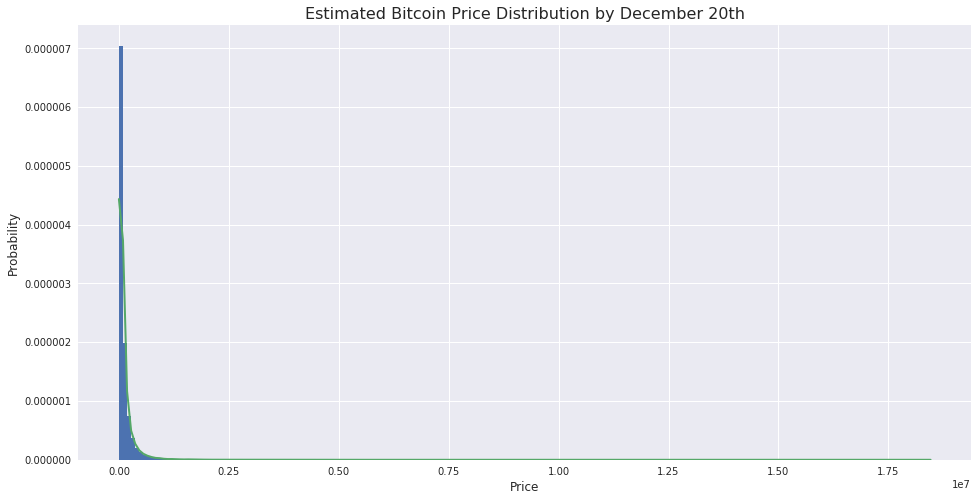

In [304]:
kde = stats.gaussian_kde(possible_prices)

fig, ax = plt.subplots(1, 1)

bins = 200

ax.hist(possible_prices, bins=bins, density=True);

xd = np.linspace(min(possible_prices)-10, max(possible_prices)+10, bins)
ax.plot(xd, kde.pdf(xd), linewidth=2);

ax.set_xlabel('Price', size=12)
ax.set_ylabel('Probability', size=12)
ax.set_title('Estimated Bitcoin Price Distribution by December 20th', size=16);